In [1]:
import pandas as pd

In [44]:
df = pd.read_csv('./data/data.csv')

In [45]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [46]:
df.shape

(45584, 20)

In [47]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [48]:
df.isnull().sum()/df.shape[0]

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            0.040672
Delivery_person_Ratings        0.041857
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    0.037974
Time_Order_picked              0.000000
Weather_conditions             0.013514
Road_traffic_density           0.013184
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            0.021784
Festival                       0.005002
City                           0.026325
Time_taken (min)               0.000000
dtype: float64

There are about 4% missing values in the dataframe. We can drop the missing values for now from a copy of the dataset and check peformance. If we run into some issues, we can try to come up with strategies to handle the missing values.

In [49]:
delivery_df = df.copy()
delivery_df = delivery_df.dropna()

In [50]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41359 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41359 non-null  object 
 1   Delivery_person_ID           41359 non-null  object 
 2   Delivery_person_Age          41359 non-null  float64
 3   Delivery_person_Ratings      41359 non-null  float64
 4   Restaurant_latitude          41359 non-null  float64
 5   Restaurant_longitude         41359 non-null  float64
 6   Delivery_location_latitude   41359 non-null  float64
 7   Delivery_location_longitude  41359 non-null  float64
 8   Order_Date                   41359 non-null  object 
 9   Time_Orderd                  41359 non-null  object 
 10  Time_Order_picked            41359 non-null  object 
 11  Weather_conditions           41359 non-null  object 
 12  Road_traffic_density         41359 non-null  object 
 13  Vehicle_conditio

In [51]:
# Check the number of unique values for ID. Although it doesn't seem to be concentrated
# but in case it is, we can use it as a feature or else drop it.

delivery_df.ID.nunique()

41359

In [52]:
# As we can see the number of unique counts is same as number of rows. So we will proceed with dropping the column

delivery_df.drop(columns = 'ID', axis=1, inplace=True)

In [53]:
delivery_df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Observations and Key takeaways:

- Can get the order location/city from the 'Delivery_person_ID'
- `'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'` indicate the exact location of restaurant and delivery. We will use that to calculate the `Order_Distance`.
- From DataFrame.info(), we noticed that columns `'Order_Date', 'Time_Orderd', 'Time_Order_picked'` are of object type. Will convert them to Datetime object and extract the Month and Year of order for some insights on how delivery time has changed over time.

In [61]:
cat_columns = ['Weather_conditions', 'Road_traffic_density', 
           'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 
           'multiple_deliveries', 'Festival', 'City']

In [63]:
for col in cat_columns:
    print(delivery_df[col].value_counts())
    print("-"*40)

Fog           7115
Stormy        6995
Cloudy        6947
Sandstorms    6851
Windy         6839
Sunny         6612
Name: Weather_conditions, dtype: int64
----------------------------------------
Low       13980
Jam       13155
Medium    10123
High       4101
Name: Road_traffic_density, dtype: int64
----------------------------------------
0    13921
2    13752
1    13686
Name: Vehicle_condition, dtype: int64
----------------------------------------
Meal      10419
Snack     10416
Drinks    10301
Buffet    10223
Name: Type_of_order, dtype: int64
----------------------------------------
motorcycle          24294
scooter             13720
electric_scooter     3345
Name: Type_of_vehicle, dtype: int64
----------------------------------------
1.0    26168
0.0    12973
2.0     1881
3.0      337
Name: multiple_deliveries, dtype: int64
----------------------------------------
No     40526
Yes      833
Name: Festival, dtype: int64
----------------------------------------
Metropolitian    31816
Ur

We can first check the distribution of numeric columns.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

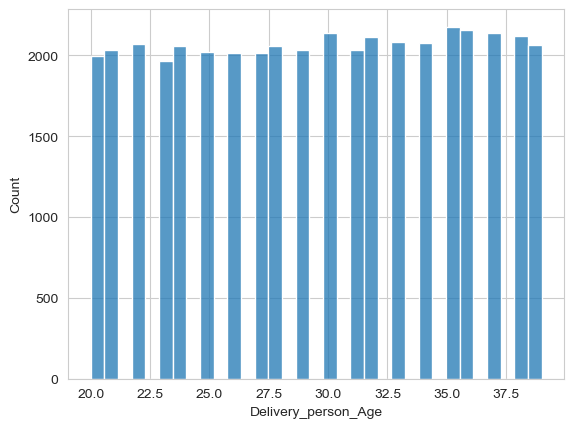

In [71]:
fig, ax = plt.subplots()
sns.histplot(data = delivery_df, x = 'Delivery_person_Age')
plt.show()

Quite a uniform distribution of ages among delivery partners

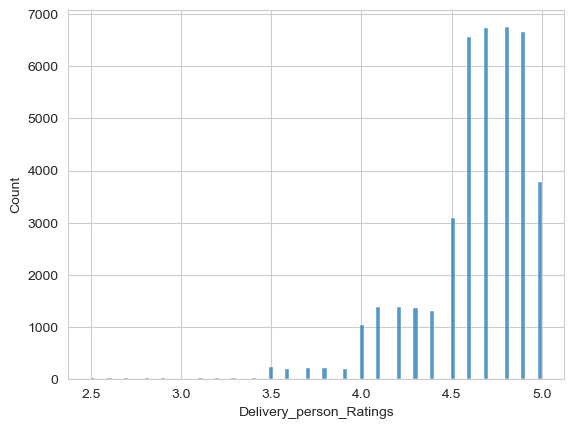

In [73]:
fig, ax = plt.subplots()
sns.histplot(data = delivery_df, x = 'Delivery_person_Ratings')
plt.show()

The data shows that majority of the ratings are on the higher end of the spectrum as is generally observed.

Lets have a quick look at how the delivery times vary with age and ratings

In [86]:
age_group = delivery_df.groupby('Delivery_person_Age')['Time_taken (min)'].median()
age_df = pd.DataFrame(age_group)

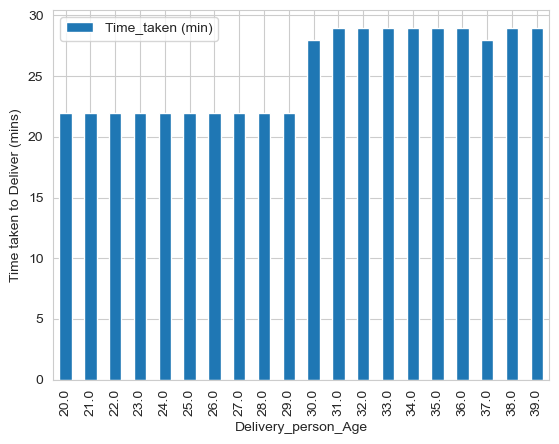

In [94]:
age_df.plot(kind = 'bar')
plt.ylabel('Time taken to Deliver (mins)')
plt.show()

Delivery agents younger than 30 take on average less time than their older counterparts.

In [92]:
ratings_group = delivery_df.groupby('Delivery_person_Ratings')['Time_taken (min)'].median()
ratings_df = pd.DataFrame(ratings_group)

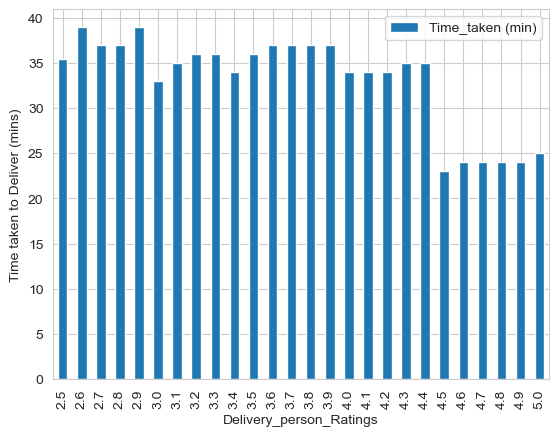

In [95]:
ratings_df.plot(kind = 'bar')
plt.ylabel('Time taken to Deliver (mins)')
plt.show()

As expected, delivery times for higher ratings are lower. 

def deg2rad(deg):
    import math
    return deg*math.pi/180

def getDistancefromLatLonginKm(lat1, lon1, lat2, lon2):
    import math
    earth_radius = 6371 # Radius of earth in kms
    dlat = deg2rad(lat2-lat1)
    dlon = deg2rad(lon2-lon1)
    
    a = math.sin(dlat/2)**2 + math.cos(deg2rad(lat1))*math.cos(deg2rad(lat2))*math.sin(dlon/2)**2
    c = 2*math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = earth_radius*c
    
    return round(d, 2)

df['delivery_distance'] = df.apply(
    lambda x: getDistancefromLatLonginKm(x['Restaurant_latitude'], x['Restaurant_longitude'], x['Delivery_location_latitude'], x['Delivery_location_longitude']),
    axis=1
)